<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

## Question: Predict the birth rate of America in 2023

## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Data preparation

In [2]:
data = pd.read_csv("../data/processed/21127667_americas_processed.csv")
america_df = data.loc[data['Country'] == 'United States']
america_df
# df_copy = data.drop(['Year', 'Country'], axis='columns')
# corr_matrix = df_copy.corr()
# fig, ax = plt.subplots(figsize=(11, 9))
# sns.heatmap(corr_matrix,cmap="Greens", annot=True, linewidths=2, ax = ax)
# correlations = X_train.corr()


,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Literacy rate,Year,Country
1092,333287557.0,168266218.0,165021339.0,18.184992,6.828165,12.000000,20.153997,17.004881,8.655858,11.811210,...,21.149982,63.452255,70.19852,76.07276,106.128710,39.528947,95.522408,97.105964,2022,United States
1093,332031554.0,167550001.0,164481553.0,11.000000,10.400000,12.000000,19.183660,1.662403,1.005457,8.562830,...,21.149982,63.452255,73.50000,79.30000,98.305489,84.855087,101.091278,97.105964,2021,United States
1094,331511512.0,167203009.0,164308503.0,10.900000,10.300000,12.000000,19.418410,1.746393,1.044278,8.705888,...,11.160000,63.452255,74.20000,79.90000,100.305794,87.567657,100.923668,97.105964,2020,United States
1095,328329953.0,165599806.0,162730147.0,11.400000,8.700000,12.000000,19.617970,1.679713,0.962271,8.710109,...,10.420000,63.452255,76.30000,81.40000,100.981300,87.888710,100.489052,97.105964,2019,United States
1096,326838199.0,164926348.0,161911851.0,11.600000,8.678000,12.000000,19.569290,1.708719,0.975559,8.580613,...,10.120000,63.452255,76.20000,81.20000,101.256561,88.299179,100.092697,97.105964,2018,United States
1097,325122128.0,164151819.0,160970309.0,11.800000,8.638000,12.000000,19.427050,1.768335,0.961346,8.535977,...,9.920000,63.452255,76.10000,81.10000,101.821442,88.167389,98.832199,97.105964,2017,United States
1098,323071755.0,163224028.0,159847727.0,12.200000,8.493000,12.000000,19.474860,1.781334,0.979190,8.532497,...,9.460000,63.452255,76.10000,81.10000,101.362862,88.835052,95.522408,97.105964,2016,United States
1099,320738994.0,162158413.0,158580581.0,12.400000,8.440000,12.000000,19.555260,1.781391,0.969498,8.661249,...,9.030000,82.427828,76.30000,81.20000,100.299911,88.889412,95.522408,97.105964,2015,United States
1100,318386329.0,161084758.0,157301571.0,12.500000,8.237000,12.000000,19.708070,1.661639,0.888076,8.714112,...,9.220000,83.089042,76.50000,81.30000,99.673378,88.626869,95.522408,97.105964,2014,United States
1101,316059947.0,160034189.0,156025758.0,12.400000,8.215000,12.000000,19.685150,1.624083,0.871062,8.668359,...,9.080000,82.940510,76.40000,81.20000,99.455437,88.726418,95.522408,97.105964,2013,United States


## Feature engineering

<Axes: >

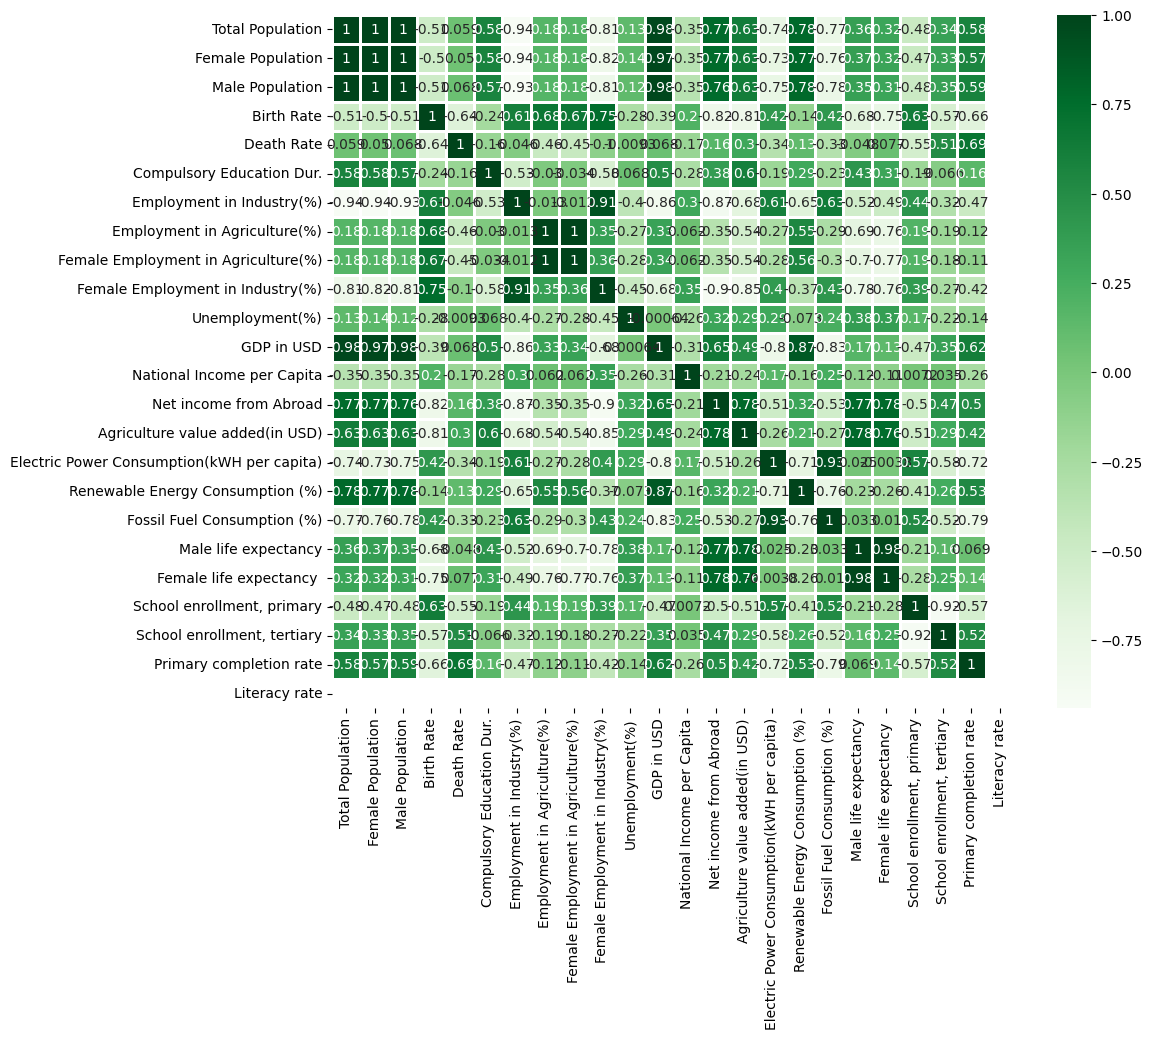

In [3]:
def select_attribute(threshold, corr_matrix):
    corrs = np.abs(corr_matrix)
    selected_corrs = corrs[corrs > threshold].index.values.tolist()
    return selected_corrs
df_copy = america_df.drop(['Year', 'Country'], axis='columns')
corr_matrix = df_copy.corr()
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix,cmap="Greens", annot=True, linewidths=2, ax = ax)

In [4]:
birth_rate = corr_matrix.iloc[:, 3]
birth_rate = birth_rate.sort_values(ascending=False)
selected_df = select_attribute(0.6, birth_rate)
selected_df = selected_df[:6]
selected_df.remove('Birth Rate')
selected_df

['Female Employment in Industry(%)',
 'Employment in Agriculture(%)',
 'Female Employment in Agriculture(%)',
 'School enrollment, primary',
 'Employment in Industry(%)']

## Training model

In [5]:
y_train = df_copy['Birth Rate']
x_train = df_copy[selected_df]
x_train


,Female Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),"School enrollment, primary",Employment in Industry(%)
1092,11.811210,17.004881,8.655858,106.128710,20.153997
1093,8.562830,1.662403,1.005457,98.305489,19.183660
1094,8.705888,1.746393,1.044278,100.305794,19.418410
1095,8.710109,1.679713,0.962271,100.981300,19.617970
1096,8.580613,1.708719,0.975559,101.256561,19.569290
1097,8.535977,1.768335,0.961346,101.821442,19.427050
1098,8.532497,1.781334,0.979190,101.362862,19.474860
1099,8.661249,1.781391,0.969498,100.299911,19.555260
1100,8.714112,1.661639,0.888076,99.673378,19.708070
1101,8.668359,1.624083,0.871062,99.455437,19.685150


In [6]:
y_train

1092    18.184992
1093    11.000000
1094    10.900000
1095    11.400000
1096    11.600000
1097    11.800000
1098    12.200000
1099    12.400000
1100    12.500000
1101    12.400000
1102    12.600000
1103    12.700000
1104    13.000000
1105    13.500000
1106    14.000000
1107    14.300000
1108    14.300000
1109    14.000000
1110    14.000000
1111    14.100000
1112    14.000000
1113    14.100000
1114    14.400000
1115    14.200000
1116    14.300000
1117    14.200000
1118    14.400000
1119    14.600000
Name: Birth Rate, dtype: float64

## Evaluation

In [7]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[-0.44560583  4.3209463  -7.7423238   0.10863114  0.89820096]
-12.64255130796861


## Prediction

In [8]:
agriculture_rate = 10.5 
# https://www.ers.usda.gov/data-products/ag-and-food-statistics-charting-the-essentials/ag-and-food-sectors-and-the-economy/#:~:text=Agriculture%20and%20its%20related%20industries,percent%20of%20total%20U.S.%20employment.
industry_rate = 19.9
# https://www.bls.gov/ces/data/employment-and-earnings/2023/home.htm
prim_enroll_rate = 100
# https://tradingeconomics.com/united-states/school-enrollment-primary-percent-gross-wb-data.html
findustry_rate = x_train['Female Employment in Industry(%)'].mean()
#can't find so I will assign it to the mean of all years
fagriculture_rate = x_train['Female Employment in Agriculture(%)'].mean()
#can't find so I will assign it to the mean of all years
dict_pd = {'Female Employment in Industry(%)': [findustry_rate] , 'Employment in Agriculture(%)': [agriculture_rate],	
 'Female Employment in Agriculture(%)': [fagriculture_rate], 'School enrollment, primary': [prim_enroll_rate], 'Employment in Industry(%)': [industry_rate] }
test = pd.DataFrame.from_dict(dict_pd)
test
result = lr.predict(test)
result[0]

46.730728247719824

## Results analysis

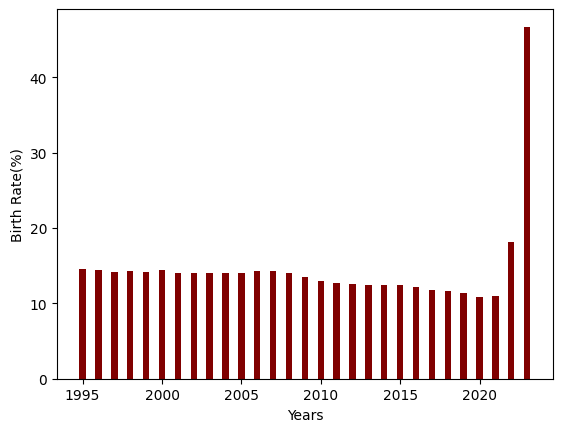

In [11]:
birth_result = df_copy['Birth Rate'].tolist()
birth_result.append(result[0])

year = america_df['Year'].tolist()
year.append(2023)

plt.bar(year, birth_result, color ='maroon', 
        width = 0.4) 
plt.xlabel("Years")
plt.ylabel("Birth Rate(%)")
plt.show()

## Conclusion

**Your conclusion**

My prediction of the birth rate using linear regression is larger than usual, it is about 46.7 per 1000 people. It is higher than usual so the information I collected about this year is maybe wrong.